In [1]:
# Importing Packages
import numpy as np
from matplotlib import pyplot
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 8s 2us/step


In [ ]:
X_train.shape, y_train.shape, "____" , X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '____', (10000, 28, 28), (10000,))

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["Trouser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" ,  "Ankle boot"]
class_labels

['Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

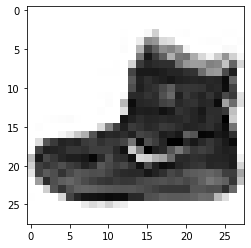

In [ ]:
plt.imshow(X_train[0] , cmap="Greys")

Text(0.5, 1.0, 'Trouser / 0')

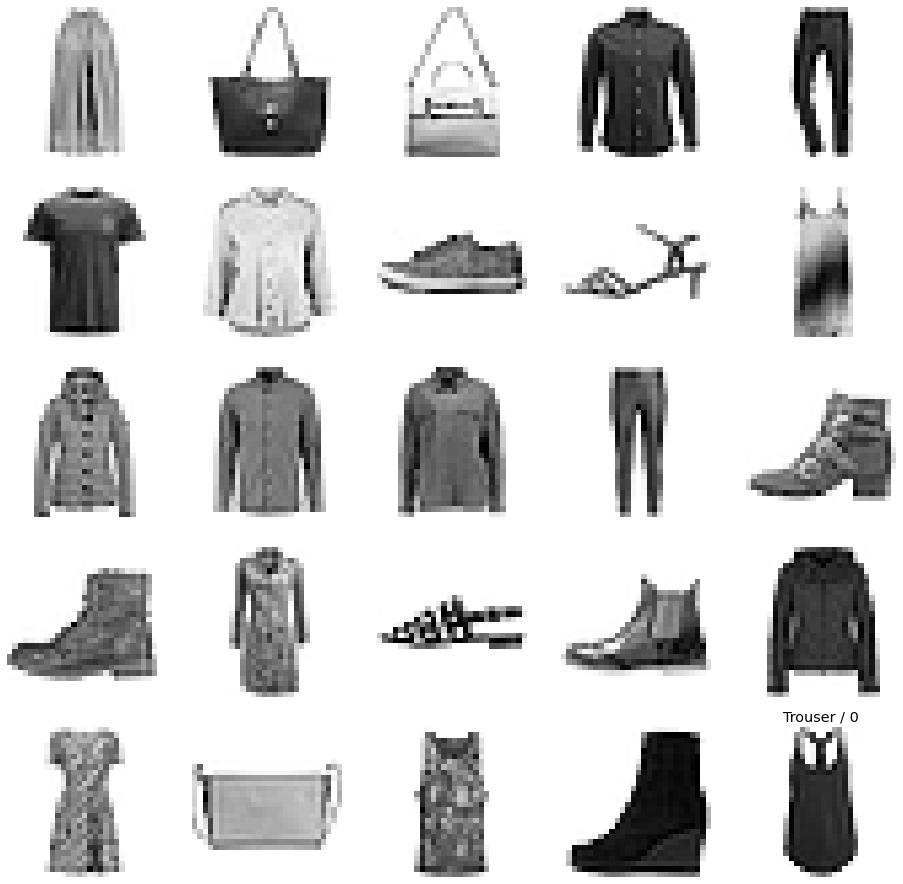

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [ ]:
X_train. shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train =X_train/255
X_test = X_test/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [ ]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [ ]:
cnn = keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])


In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train = cnn.fit(X_train, y_train, epochs=20 , batch_size=16 , verbose=1 , validation_data=(X_validation, y_validation))

Epoch 1/20
3000/3000 [==============================] - 48s 16ms/step - loss: 0.2031 - accuracy: 0.9256 - val_loss: 0.3106 - val_accuracy: 0.8987
Epoch 2/20
3000/3000 [==============================] - 55s 18ms/step - loss: 0.1936 - accuracy: 0.9279 - val_loss: 0.2770 - val_accuracy: 0.9078
Epoch 3/20
3000/3000 [==============================] - 51s 17ms/step - loss: 0.1863 - accuracy: 0.9309 - val_loss: 0.2875 - val_accuracy: 0.9046
Epoch 4/20
3000/3000 [==============================] - 51s 17ms/step - loss: 0.1831 - accuracy: 0.9332 - val_loss: 0.2906 - val_accuracy: 0.9037
Epoch 5/20
3000/3000 [==============================] - 49s 16ms/step - loss: 0.1769 - accuracy: 0.9358 - val_loss: 0.3057 - val_accuracy: 0.9038
Epoch 6/20
3000/3000 [==============================] - 48s 16ms/step - loss: 0.1777 - accuracy: 0.9349 - val_loss: 0.2969 - val_accuracy: 0.9062
Epoch 7/20
3000/3000 [==============================] - 48s 16ms/step - loss: 0.1700 - accuracy: 0.9379 - val_loss: 0.3193 -

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3741 - accuracy: 0.8986


[0.37411144375801086, 0.8985999822616577]

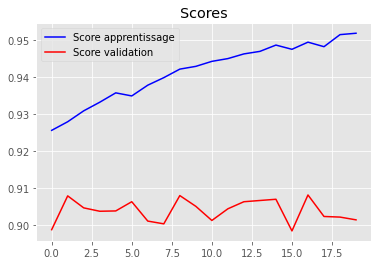

In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()
plot_scores(train)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred

313/313 [==============================] - 3s 9ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0514820e-16,
        4.0759036e-33, 9.9999994e-01],
       [7.2959743e-08, 1.1564177e-09, 9.9999923e-01, ..., 0.0000000e+00,
        5.2117200e-20, 1.5064278e-27],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.9312721e-38, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00],
       [1.7731509e-29, 9.9999994e-01, 7.0046544e-38, ..., 0.0000000e+00,
        4.9496357e-33, 0.0000000e+00],
       [6.5283523e-10, 4.3289224e-15, 8.4001348e-12, ..., 1.2415966e-04,
        6.8155432e-09, 3.6861106e-06]], dtype=float32)

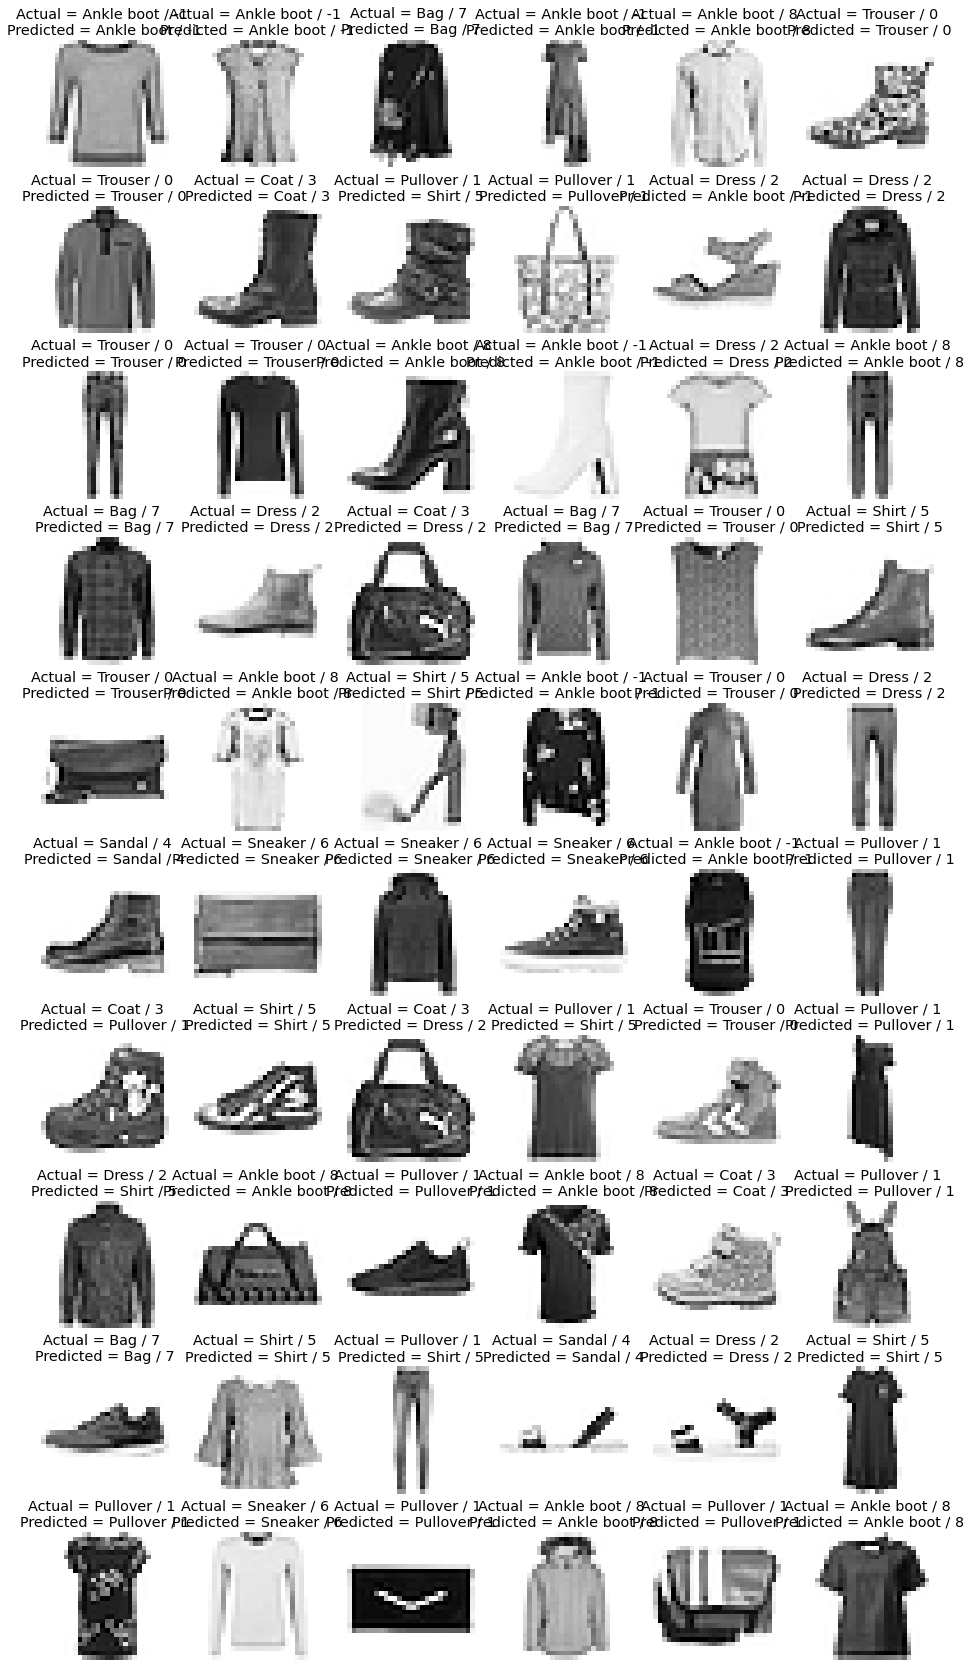

In [ ]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(X_train[i].reshape(28,28),cmap='Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]-1], y_test[i]-1, class_labels[np.argmax(y_pred[i])-1],np.argmax(y_pred[i])-1))

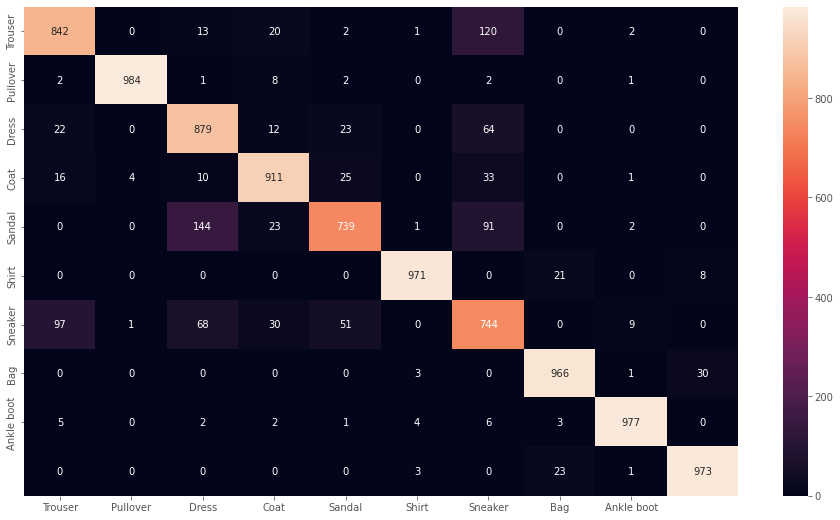

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test , y_pred_labels)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_pred_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.79      0.88      0.83      1000
           3       0.91      0.91      0.91      1000
           4       0.88      0.74      0.80      1000
           5       0.99      0.97      0.98      1000
           6       0.70      0.74      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

